In [14]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
#import distance
from nltk.stem import PorterStemmer

import string
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import remove_stopwords, strip_punctuation

import re

from nltk.tokenize import word_tokenize
  
ps = PorterStemmer()


In [18]:
df = pd.read_csv('smsspamcollection/SMSSpamCollection' , sep='\t' , names =['label','message'])

In [19]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [21]:
df['message_wsw']= df['message'].apply(remove_stopwords).apply(strip_punctuation)

In [22]:
df.label.unique() #Binary Classification

array(['ham', 'spam'], dtype=object)

In [24]:
df.label.value_counts()


ham     4825
spam     747
Name: label, dtype: int64

In [25]:
df['len_message']= df['message'].apply(len)

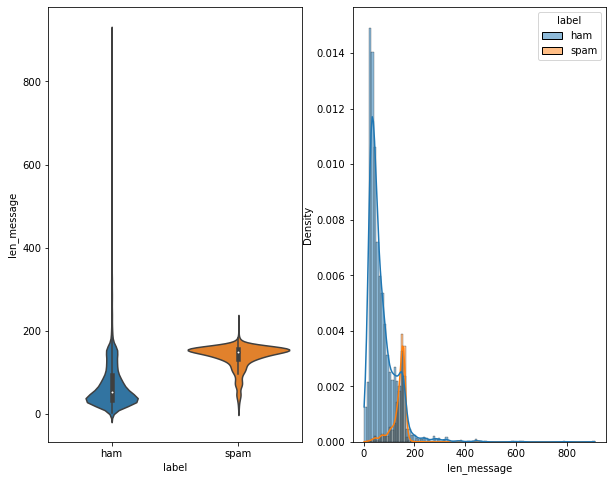

In [41]:

plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'label', y = 'len_message', data = df , )

plt.subplot(1,2,2)
sns.histplot(data=df, x= 'len_message' ,stat= "density",kde= True, hue= 'label',common_norm=True)
#sns.distplot(df[df['label'] == 'ham']['len_message'] , label = "ham" , color = 'blue' )
plt.show()

### Above shows that len of message is able to seperate spams and hams 

In [32]:
#sns.histplot?

In [11]:
#Prepare our feature compatible for ML algorithm
#Sklearn helps you to achieve this target
# text Features ====> BagOfWords ===> TF-IDF ===> Freq ==> Feature Array

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
wordVector = CountVectorizer()
finalWordVectorCreator = wordVector.fit(df['message_wsw'])

In [46]:
#finalWordVectorCreator.vocabulary_

In [49]:
len(finalWordVectorCreator.vocabulary_)

8669

In [50]:
bow = finalWordVectorCreator.transform(df['message_wsw'])

In [51]:
count_vec=bow.toarray() # this is count vector , raw freq for each word in the document
count_vec.shape

(5572, 8669)

In [52]:
#Tf-IDF
from sklearn.feature_extraction.text import TfidfTransformer
tfidfObject = TfidfTransformer(smooth_idf=True)  # converted count vec to tfidf

In [78]:


features = tfidfObject.fit_transform(bow)
#features= np.concatenate(features, df.len_message.values, axis=0)

In [79]:
 len(df.len_message.values)

5572

In [80]:
features.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [82]:
#Create Model
from sklearn.naive_bayes import MultinomialNB #Best for Text Data Features


from sklearn.model_selection import train_test_split

# from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
# y= y.ravel()

X_train, X_test, y_train, y_test  = train_test_split(features,data['label'], test_size=0.2, random_state=1)

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [84]:
model.score(X_train, y_train), model.score(X_test, y_test)


(0.980480143594346, 0.9748878923766816)

In [99]:
from sklearn.metrics import confusion_matrix
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = ['ham', 'spam']
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

In [100]:
y_train_pred= model.predict(X_train)
y_test_pred= model.predict(X_test)

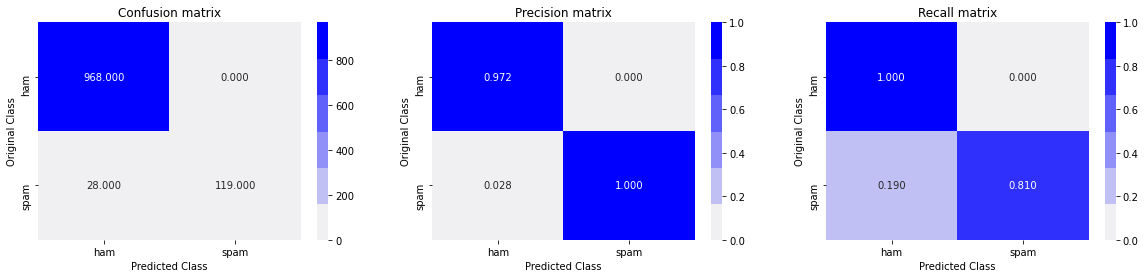

In [101]:
plot_confusion_matrix(y_test, y_test_pred)

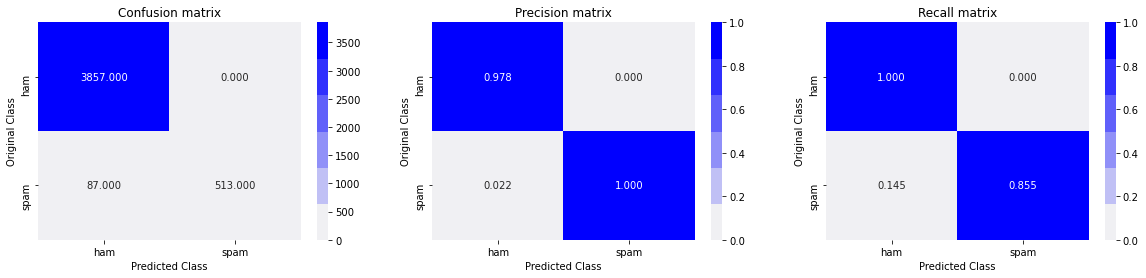

In [102]:
plot_confusion_matrix(y_train, y_train_pred)

In [108]:
#Realtime Input Example
inputSMS = input("Enter SMS to check: ")
preprocessText = strip_punctuation(remove_stopwords(inputSMS))
bowText = finalWordVectorCreator.transform([preprocessText])
featureText = tfidfObject.transform(bowText)
predict = model.predict(featureText)[0]
print("Given SMS is a {} SMS".format(predict))

Enter SMS to check: Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18
Given SMS is a spam SMS


In [107]:
df.message.iloc[2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"